# File and folder

In [12]:
import os
os.listdir()

['.gitkeep',
 '10_Hyoerparameters.ipynb',
 '1_2_3_4 Regression - Linear Regression and SaveModel.ipynb',
 '5_LogisticRegression&ConfusionMatrix.ipynb',
 '6_Pandas&EDA.ipynb',
 '7_SVM.ipynb',
 '8_KNN&NaiveBayes.ipynb',
 '9_DecisionTree.ipynb',
 'Classification - LogisticRegression&ConfusionMatrix.ipynb',
 'Classification(LR+SVM+DT+RF)_1.ipynb',
 'DecisionTree_Randomforest.ipynb',
 'Employee_attrition_Logistic.csv',
 'framingham_Logistic.csv',
 'heart_logistic.csv',
 'Housing+Case+Study+using+RFE.ipynb',
 'Lasso_MLR.ipynb',
 'Lasso_SLR.ipynb',
 'Logistic+Regression+-+Telecom+Churn+Case+Study.ipynb',
 'Metrics.ipynb',
 'MLR_1.ipynb',
 'movie_review_test.csv',
 'movie_review_train.csv',
 'Multiple+Linear+Regression+-+Housing+Case+Study (1).ipynb',
 'Multiple+Linear+Regression+-+Housing+Case+Study.ipynb',
 'Outliers.ipynb',
 'Pearson_SimpleLinear.txt',
 'Ridge_MLR.ipynb',
 'Ridge_SLR.ipynb',
 'SLR_1.ipynb',
 'student-por.csv',
 'test_DecisionTree.csv',
 'train_DecisionTree.csv',
 'winequali

# Load data

In [13]:
import pandas as pd
data=pd.read_csv("Pearson_SimpleLinear.txt",sep="\t")
data.head()

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3


# Data cleanup

<Axes: >

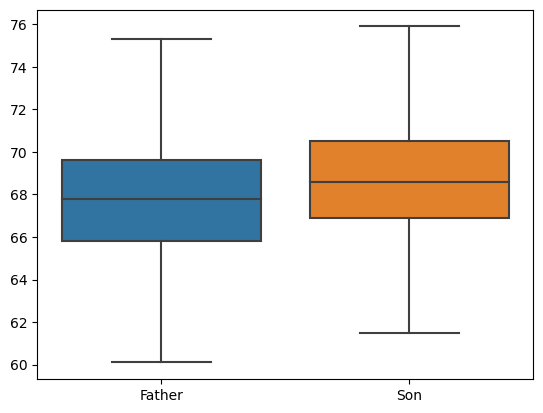

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
Q1=data["Father"].quantile(0.25)
Q3=data["Father"].quantile(0.75)
IQR=Q3-Q1
Lu=Q1-(1.5*IQR)
ub=Q3+(1.5*IQR)
Lu,ub
data.loc[data["Father"]<Lu ,"Father"]=Lu
data.loc[data["Father"]>ub ,"Father"]=ub

Q1=data["Son"].quantile(0.25)
Q3=data["Son"].quantile(0.75)
IQR=Q3-Q1
Lu=Q1-(1.5*IQR)
ub=Q3+(1.5*IQR)
Lu,ub
data.loc[data["Son"]<Lu ,"Son"]=Lu
data.loc[data["Son"]>ub ,"Son"]=ub


sns.boxplot(data)


# Plot

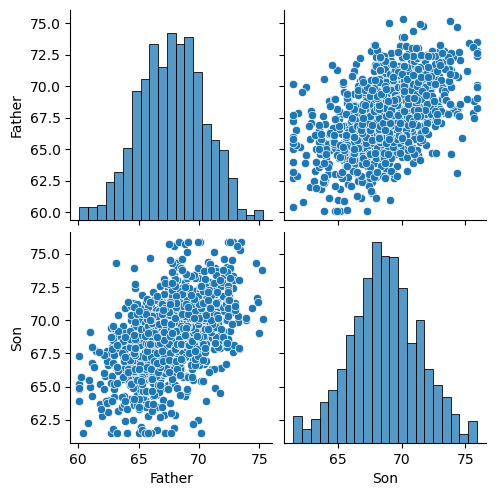

In [15]:
sns.pairplot(data)
plt.show()

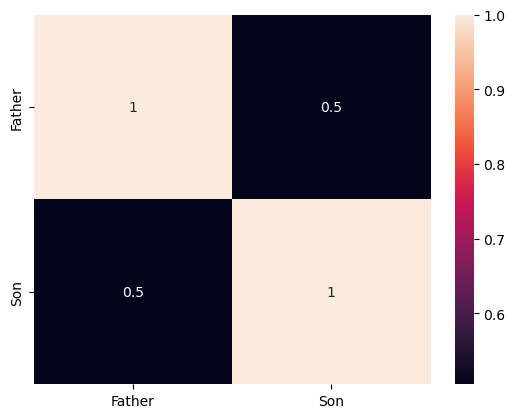

In [16]:
sns.heatmap(data.corr(),annot=True)
plt.show()

# Split data

In [17]:
from sklearn.model_selection import train_test_split
x=data["Father"]
y=data["Son"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print("Length of x_train : ",len(x_train))
print("Length of y_train : ",len(y_train))
print("Length of x_test : ",len(x_test))
print("Length of y_test : ",len(y_test))

Length of x_train :  754
Length of y_train :  754
Length of x_test :  324
Length of y_test :  324


# Train data

In [18]:
from sklearn.linear_model import LinearRegression
import numpy as  np
model=LinearRegression()
model.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

# Predict

In [19]:
y_pred=model.predict(np.array(x_test).reshape(-1,1))
print(y_pred)

[[70.0768357 ]
 [68.02455576]
 [70.49662023]
 [69.05069573]
 [68.8174821 ]
 [68.30441211]
 [68.07119848]
 [67.51148577]
 [69.89026479]
 [68.58426847]
 [70.86976204]
 [69.98355024]
 [67.18498669]
 [67.7446994 ]
 [67.83798485]
 [70.68319113]
 [67.69805668]
 [67.32491487]
 [68.39769756]
 [69.42383753]
 [69.05069573]
 [68.91076755]
 [70.68319113]
 [67.41820032]
 [69.05069573]
 [68.91076755]
 [69.75033662]
 [68.30441211]
 [68.77083937]
 [69.65705116]
 [67.37155759]
 [65.50584856]
 [66.4853458 ]
 [69.28390936]
 [68.25776939]
 [68.49098302]
 [68.91076755]
 [65.69241946]
 [68.39769756]
 [68.58426847]
 [69.33055208]
 [67.32491487]
 [67.88462758]
 [69.61040844]
 [70.72983386]
 [67.88462758]
 [69.42383753]
 [68.63091119]
 [68.35105484]
 [68.67755392]
 [67.13834397]
 [65.92563309]
 [67.37155759]
 [67.27827214]
 [67.83798485]
 [69.84362207]
 [70.40333478]
 [68.91076755]
 [68.25776939]
 [70.96304749]
 [69.51712299]
 [69.1906239 ]
 [68.86412482]
 [68.11784121]
 [69.09733845]
 [70.40333478]
 [68.16448

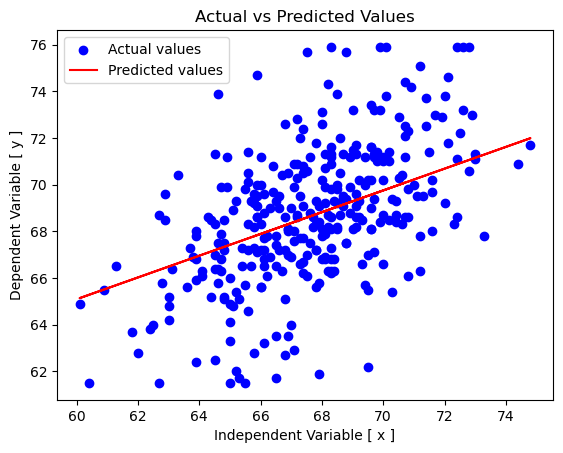

In [20]:
plt.scatter(x_test,y_test,color='blue', label='Actual values')
plt.plot(x_test,y_pred,color='red', label='Predicted values')
plt.xlabel('Independent Variable [ x ]')
plt.ylabel('Dependent Variable [ y ]')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Evaluation Metrics

In [21]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
model_mae=mean_absolute_error(y_test,y_pred)
model_mse=mean_squared_error(y_test,y_pred)
model_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
model_r2s=r2_score(y_test,y_pred)
train_score=model.score(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
test_score=model.score(np.array(x_test).reshape(-1,1),np.array(y_test).reshape(-1,1))
model_intercept=model.intercept_
model_coeff=model.coef_

print("Model intercept : ",model.intercept_)
print("Model coefficient : ",model.coef_)
print("Train score : ",train_score)
print("Test score : ",test_score)
print("R2 score error : ",model_r2s)
print("Mean absolute error : ",model_mae)
print("Mean squared error : ",model_mse)
print("Root Mean square error : ",model_rmse)

Model intercept :  [37.10042849]
Model coefficient :  [[0.46642726]]
Train score :  0.2410383935973076
Test score :  0.2753901837099143
R2 score error :  0.2753901837099143
Mean absolute error :  1.9695324770101932
Mean squared error :  6.434651684942529
Root Mean square error :  2.536661523527041
